In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

###### Quick example of PCR... Principal Components Regression (principal components for feature engineering)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Last time: We saw PCA as an approach to dimensionality reduction and data exploration. We find a new coordinate system which can facilitate visualization (PC=2 or 3) or more economically encode much of the information in the data.  

We can use PCA to potentially engineer features that mighyt help in modeling. The PCs have some nice properties:
    
    1. They are perpendicualr to one another so have no multicolinearity in them. (Recall that Ridge and Lasso help deal with colinearity)
    2. They reduce the number of features (since we presumably only use some of the PCs). This can increase bias and reduce variance so help with a more generalizable model.
    3. They accomplish 2 in (presumably) an information rich way. 

Try out on the dataset of 1985 to 2018 NBA players. We have stats and salaries.

In [ ]:
sal=pd.read_csv('/content/drive/MyDrive/Data 599/salaries_1985to2018.csv')
sal.head()

,league,player_id,salary,season,season_end,season_start,team
0,NBA,abdelal01,395000,1990-91,1991,1990,Portland Trail Blazers
1,NBA,abdelal01,494000,1991-92,1992,1991,Portland Trail Blazers
2,NBA,abdelal01,500000,1992-93,1993,1992,Boston Celtics
3,NBA,abdelal01,805000,1993-94,1994,1993,Boston Celtics
4,NBA,abdelal01,650000,1994-95,1995,1994,Sacramento Kings


In [ ]:
len(sal.groupby('player_id').count())

2408

So we have 2408 unique players.

Cleanup (again)... get average salary per player, average of years played.

In [ ]:
sal_avg=sal.groupby('player_id',as_index=False).mean()[['player_id','salary','season_end']]
sal_avg.head()

,player_id,salary,season_end
0,abdelal01,5.688000e+05,1993.000000
1,abdulka01,2.140000e+06,1987.000000
2,abdulma02,2.205500e+06,1995.222222
3,abdulta01,3.798280e+06,2002.500000
4,abdursh01,8.715091e+06,2003.909091


In [ ]:
sal_avg.shape

(2408, 3)

Import the palyer stats:

In [ ]:
pl=pd.read_csv('/content/drive/MyDrive/Data 599/players.csv')
pl.head()

,_id,birthDate,birthPlace,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,...,draft_pick,draft_round,draft_team,draft_year,height,highSchool,name,position,shoots,weight
0,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,5.7,...,25th overall,1st round,Portland Trail Blazers,1990,6-10,"Bloomfield in Bloomfield, New Jersey",Alaa Abdelnaby,Power Forward,Right,240lb
1,abdulza01,"April 7, 1946","Brooklyn, New York",1.2,42.8,NaN,72.8,505,15.1,9.0,...,5th overall,1st round,Cincinnati Royals,1968,6-9,"John Jay in Brooklyn, New York",Zaid Abdul-Aziz,Power Forward and Center,Right,235lb
2,abdulka01,"April 16, 1947","New York, New York",3.6,55.9,5.6,72.1,1560,24.6,24.6,...,1st overall,1st round,Milwaukee Bucks,1969,7-2,"Power Memorial in New York, New York",Kareem Abdul-Jabbar,Center,Right,225lb
3,abdulma02,"March 9, 1969","Gulfport, Mississippi",3.5,44.2,35.4,90.5,586,15.4,14.6,...,3rd overall,1st round,Denver Nuggets,1990,6-1,"Gulfport in Gulfport, Mississippi",Mahmoud Abdul-Rauf,Point Guard,Right,162lb
4,abdulta01,"November 3, 1974","Maisons Alfort, France",1.1,41.7,23.7,70.3,236,11.4,7.8,...,11th overall,1st round,Sacramento Kings,1997,6-6,"Lycee Aristide Briand in Evreux, France",Tariq Abdul-Wahad,Shooting Guard,Right,223lb


In [ ]:
pl.groupby("_id").count().shape

(4685, 23)

Have more players than salaries.

Merge stats and salaries.

In [ ]:
plsal=sal_avg.merge(pl,how='left',left_on='player_id',right_on='_id')

In [ ]:
plsal.shape

(2408, 27)

In [ ]:
plsal.head()

,player_id,salary,season_end,_id,birthDate,birthPlace,career_AST,career_FG%,career_FG3%,career_FT%,...,draft_pick,draft_round,draft_team,draft_year,height,highSchool,name,position,shoots,weight
0,abdelal01,5.688000e+05,1993.000000,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,...,25th overall,1st round,Portland Trail Blazers,1990,6-10,"Bloomfield in Bloomfield, New Jersey",Alaa Abdelnaby,Power Forward,Right,240lb
1,abdulka01,2.140000e+06,1987.000000,abdulka01,"April 16, 1947","New York, New York",3.6,55.9,5.6,72.1,...,1st overall,1st round,Milwaukee Bucks,1969,7-2,"Power Memorial in New York, New York",Kareem Abdul-Jabbar,Center,Right,225lb
2,abdulma02,2.205500e+06,1995.222222,abdulma02,"March 9, 1969","Gulfport, Mississippi",3.5,44.2,35.4,90.5,...,3rd overall,1st round,Denver Nuggets,1990,6-1,"Gulfport in Gulfport, Mississippi",Mahmoud Abdul-Rauf,Point Guard,Right,162lb
3,abdulta01,3.798280e+06,2002.500000,abdulta01,"November 3, 1974","Maisons Alfort, France",1.1,41.7,23.7,70.3,...,11th overall,1st round,Sacramento Kings,1997,6-6,"Lycee Aristide Briand in Evreux, France",Tariq Abdul-Wahad,Shooting Guard,Right,223lb
4,abdursh01,8.715091e+06,2003.909091,abdursh01,"December 11, 1976","Marietta, Georgia",2.5,47.2,29.7,81.0,...,3rd overall,1st round,Vancouver Grizzlies,1996,6-9,"Wheeler in Marietta, Georgia",Shareef Abdur-Rahim,Center and Small Forward and Power Forward,Right,225lb


In [ ]:
plsal.isna().sum()

player_id        0
salary           0
season_end       0
_id              0
birthDate        0
birthPlace       0
career_AST       0
career_FG%       0
career_FG3%      0
career_FT%       0
career_G         0
career_PER       0
career_PTS       0
career_TRB       0
career_WS        0
career_eFG%      0
college        269
draft_pick     524
draft_round    524
draft_team     524
draft_year     524
height           0
highSchool     208
name             0
position         0
shoots           0
weight           0
dtype: int64

In [ ]:
plsal.dtypes

player_id       object
salary         float64
season_end     float64
_id             object
birthDate       object
birthPlace      object
career_AST     float64
career_FG%      object
career_FG3%     object
career_FT%      object
career_G         int64
career_PER      object
career_PTS     float64
career_TRB      object
career_WS       object
career_eFG%     object
college         object
draft_pick      object
draft_round     object
draft_team      object
draft_year      object
height          object
highSchool      object
name            object
position        object
shoots          object
weight          object
dtype: object

Lots of columns are encoded as object types rather than numerical which is an issue for ```sklearn```. We'll need to fix. Also, PCA needs EVERYTHING to be numeric. Also, Height and weight have issues...

In [ ]:
plsal[['height','weight']].head()

,height,weight
0,6-10,240lb
1,7-2,225lb
2,6-1,162lb
3,6-6,223lb
4,6-9,225lb


We need to make these numbers...

In [ ]:
def num_ht(row):
    return int(row['height'].split("-")[0])*12+int(row['height'].split("-")[1])
def num_wt(row):
    return int(row['weight'].split("lb")[0])

In [ ]:
plsal['num_ht']=plsal.apply(num_ht,axis=1)
plsal['num_wt']=plsal.apply(num_wt,axis=1)

In [ ]:
plsal[['num_ht','num_wt']].head()

,num_ht,num_wt
0,82,240
1,86,225
2,73,162
3,78,223
4,81,225


Let's think about which columns we want to predict salary. Probably not high school, birthdate, etc.

In [ ]:
plsal.columns

Index(['player_id', 'salary', 'season_end', '_id', 'birthDate', 'birthPlace',
       'career_AST', 'career_FG%', 'career_FG3%', 'career_FT%', 'career_G',
       'career_PER', 'career_PTS', 'career_TRB', 'career_WS', 'career_eFG%',
       'college', 'draft_pick', 'draft_round', 'draft_team', 'draft_year',
       'height', 'highSchool', 'name', 'position', 'shoots', 'weight',
       'num_ht', 'num_wt'],
      dtype='object')

Note: 

1. Position might be meaningful to salary. For example, are centers more valuable because there are fewer? But if we want to do PCA we need all numeric features so we have to drop it or think of a way to encode it. Drop for now.
2. Draft pick seems very likely relevant top salary. It's currently a text field (e.g. "3rd overall") but we could certainly engineer a feature from that with some regex work. 
3. Draft year could also be relevant but is missing in many cases and is likely correlated with season_end.

In [ ]:
cols=['player_id','name', 'salary', 'season_end',
       'career_AST', 'career_FG%', 'career_FG3%', 'career_FT%', 'career_G',
       'career_PER', 'career_PTS', 'career_TRB', 'career_WS', 'career_eFG%',
       'num_ht', 'num_wt']

In [ ]:
df=plsal[cols].copy()

In [ ]:
df.dtypes

player_id       object
name            object
salary         float64
season_end     float64
career_AST     float64
career_FG%      object
career_FG3%     object
career_FT%      object
career_G         int64
career_PER      object
career_PTS     float64
career_TRB      object
career_WS       object
career_eFG%     object
num_ht           int64
num_wt           int64
dtype: object

Force to numeric dtype. This can cause errors which will become NaN.

In [ ]:
df[['career_FG%', 'career_FG3%', 'career_FT%','career_PER', 'career_TRB', 'career_WS', 'career_eFG%',]]=df[['career_FG%', 'career_FG3%', 'career_FT%','career_PER', 'career_TRB', 'career_WS', 'career_eFG%',]].apply(pd.to_numeric, errors='coerce')

In [ ]:
df.dtypes

player_id       object
name            object
salary         float64
season_end     float64
career_AST     float64
career_FG%     float64
career_FG3%    float64
career_FT%     float64
career_G         int64
career_PER     float64
career_PTS     float64
career_TRB     float64
career_WS      float64
career_eFG%    float64
num_ht           int64
num_wt           int64
dtype: object

In [ ]:
df.isna().sum()

player_id        0
name             0
salary           0
season_end       0
career_AST       0
career_FG%       9
career_FG3%    219
career_FT%      69
career_G         0
career_PER       2
career_PTS       0
career_TRB       0
career_WS        0
career_eFG%      9
num_ht           0
num_wt           0
dtype: int64

Probably some folks just never played much (FT% is undefined, i.e., never attempted a free throw. Or, never attempted 3s... possible those folks did play significantly, but were not outside shooters.)

In [ ]:
df[df['career_FT%'].isna()].head()

,player_id,name,salary,season_end,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,career_TRB,career_WS,career_eFG%,num_ht,num_wt
23,akognjo01,Josh Akognon,788872.0,2014.0,0.3,50.0,50.0,NaN,3,15.3,1.7,0.3,0.0,62.5,71,185
29,alexacl01,Cliff Alexander,288271.0,2016.5,0.0,50.0,NaN,NaN,8,11.6,1.3,0.8,0.0,50.0,80,245
65,andrima01,Martynas Andriuskevicius,531485.5,2006.5,0.0,0.0,NaN,NaN,6,15.5,0.0,0.7,0.0,0.0,86,240
70,antetth01,Thanasis Antetokounmpo,105888.0,2016.0,0.0,75.0,0.0,NaN,2,32.9,3.0,0.5,0.0,75.0,79,205
100,babbch01,Chris Babb,48028.0,2015.0,0.2,26.7,22.2,NaN,14,3.7,1.6,1.2,0.0,36.7,77,225


In [ ]:
df[df['career_FG3%'].isna()].head()

,player_id,name,salary,season_end,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,career_TRB,career_WS,career_eFG%,num_ht,num_wt
24,alabiso01,Solomon Alabi,8.000000e+05,2011.500000,0.2,31.4,NaN,70.0,26,10.3,1.5,2.3,0.0,31.4,85,251
27,aldrico01,Cole Aldrich,3.411952e+06,2014.571429,0.5,52.7,NaN,73.8,339,16.6,3.1,3.3,9.6,52.7,83,250
29,alexacl01,Cliff Alexander,2.882710e+05,2016.500000,0.0,50.0,NaN,NaN,8,11.6,1.3,0.8,0.0,50.0,80,245
32,alexaga01,Gary Alexander,1.500000e+05,1995.000000,0.2,57.1,NaN,33.3,11,8.6,1.7,1.4,0.0,57.1,79,240
65,andrima01,Martynas Andriuskevicius,5.314855e+05,2006.500000,0.0,0.0,NaN,NaN,6,15.5,0.0,0.7,0.0,0.0,86,240


Many of these are players who didn't attempt any 3P shots. Options... convert to 0, drop from data, only use eFG%?

Also, it may make sense to filter on players having played at least some minimum number of games?

In [ ]:
df['career_G'].describe()

count    2408.000000
mean      367.612957
std       341.375123
min         1.000000
25%        69.000000
50%       255.000000
75%       612.000000
max      1611.000000
Name: career_G, dtype: float64

In [ ]:
#Questionable...
df=df[df['career_G']>=50].copy()

In [ ]:
df['career_FG3%'].fillna(0,inplace=True)

In [ ]:
df.isna().sum()

player_id      0
name           0
salary         0
season_end     0
career_AST     0
career_FG%     0
career_FG3%    0
career_FT%     0
career_G       0
career_PER     0
career_PTS     0
career_TRB     0
career_WS      0
career_eFG%    0
num_ht         0
num_wt         0
dtype: int64

These players played very few games in general. This suggests another issue with the data -- FG percentages and other stats like PER for small sample size players are highly unreliable. Probably more cleaning is in order to resolve this -- but we'll just move on for now.

In [ ]:
df.reset_index(inplace=True,drop=True)
df.head()

,player_id,name,salary,season_end,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,career_TRB,career_WS,career_eFG%,num_ht,num_wt
0,abdelal01,Alaa Abdelnaby,5.688000e+05,1993.000000,0.3,50.2,0.0,70.1,256,13.0,5.7,3.3,4.8,50.2,82,240
1,abdulka01,Kareem Abdul-Jabbar,2.140000e+06,1987.000000,3.6,55.9,5.6,72.1,1560,24.6,24.6,11.2,273.4,55.9,86,225
2,abdulma02,Mahmoud Abdul-Rauf,2.205500e+06,1995.222222,3.5,44.2,35.4,90.5,586,15.4,14.6,1.9,25.2,47.2,73,162
3,abdulta01,Tariq Abdul-Wahad,3.798280e+06,2002.500000,1.1,41.7,23.7,70.3,236,11.4,7.8,3.3,3.5,42.2,78,223
4,abdursh01,Shareef Abdur-Rahim,8.715091e+06,2003.909091,2.5,47.2,29.7,81.0,830,19.0,18.1,7.5,71.2,47.9,81,225


In [ ]:
df.shape

(1928, 16)

Ready to go! Let's separate out numerical and non-numerical colummns so we can do PCA.

In [ ]:
X=df.drop(['name','player_id','salary'],axis=1)
names=df[['player_id','name']]
y=df['salary']

In [ ]:
X.shape

(1928, 13)

The features have very different scales.

In [ ]:
df[['career_G','career_PTS','career_FG%','career_TRB']].head()

,career_G,career_PTS,career_FG%,career_TRB
0,256,5.7,50.2,3.3
1,1560,24.6,55.9,11.2
2,586,14.6,44.2,1.9
3,236,7.8,41.7,3.3
4,830,18.1,47.2,7.5


In [ ]:
np.round(df.mean(),3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


salary         2355281.208
season_end        2003.162
career_AST           1.806
career_FG%          45.117
career_FG3%         25.232
career_FT%          72.772
career_G           453.964
career_PER          13.078
career_PTS           8.157
career_TRB           3.553
career_WS           23.879
career_eFG%         48.130
num_ht              79.009
num_wt             216.697
dtype: float64

Now, the plan is to 

1. first do PCA, then 
2. run regression (simple OLS) using the transformed data (coordinates in terms of the PCs) as features. 

Question: How many PCs should we use? How does the model perform on new data?

These are familiar questions. We can cross validate to answer the first, but ultimately need a test set to see how our final model does on new data.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=5)

Initiate the scaler which will mean center (subtract off the column mean from each feature value) and standardize (divide by column st dev). 

Then, transform the data into the new, scaled values. Now, each value can be interpreted as "number of standard deviations from the mean".  

In [ ]:
X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)

Now, these are numpy arrays. Good for ```sklearn```, less good for human reading. Here's the first row...

In [ ]:
X_train_scaled[0]

array([ 0.35621591,  3.40578516, -0.84627811,  0.47992816, -0.14759223,
        1.1588554 ,  1.32927935,  1.6492074 ,  0.11429578,  1.19769579,
       -0.36648414, -1.11128422, -0.27664099])

In [ ]:
X.columns

Index(['season_end', 'career_AST', 'career_FG%', 'career_FG3%', 'career_FT%',
       'career_G', 'career_PER', 'career_PTS', 'career_TRB', 'career_WS',
       'career_eFG%', 'num_ht', 'num_wt'],
      dtype='object')

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
X_train_scaled.shape

(1349, 13)

There are 13 features so we'll use < 13 principal components.

First find the principal components. This is unsupervised -- just looks at the features and finds the directions that explain the most vaiance (subject to orthogonality). 

In [ ]:
pca = PCA(13).fit(X_train_scaled)

Next, transform the data -- that means project the data onto the principal components, and get new cooridinates (in terms of the PCs).

In [ ]:
pca_tr = pca.transform(X_train_scaled)

Note: If you didn't care about the actual principal components, and wanted to go directly to the transformed (projected) data, you can use: ```PCA(13).fit_transform(X_train)```

TO see how much of the variance in the original data we have in the PCs:

In [ ]:
pca.explained_variance_ratio_

array([0.35810857, 0.26299464, 0.10680034, 0.07222535, 0.05112732,
       0.04178288, 0.03364786, 0.02008972, 0.01414841, 0.01325624,
       0.01113153, 0.00923813, 0.00544903])

so for the first 3:

In [ ]:
pca.explained_variance_ratio_[0:3].sum()

0.7279035495117723

The projected training data is here:

In [ ]:
pca_tr.shape

(1349, 13)

In [ ]:
from sklearn.model_selection import cross_validate

Cross validate the number of PCs in a linear regression model. I'm using $r^2$ on the test-fold as the scoring metric. 

In [ ]:
cvres=[]
num_pcs=[1,2,3,4,5,6,7,8,9,10]
for a in num_pcs:
    reg = LinearRegression()
    cvreg = cross_validate(reg, pca_tr[:,0:a], y_train, cv=5, scoring='r2')
    cvres.append(cvreg['test_score'].mean())

In [ ]:
cvres

[0.375570313790811,
 0.37500055007713806,
 0.463510812246716,
 0.5695157121384666,
 0.6255565771773142,
 0.6256110626841541,
 0.6339382611219072,
 0.6327003624156846,
 0.6368583012360739,
 0.6362316584992294]

In [ ]:
np.argmax(cvres)

8

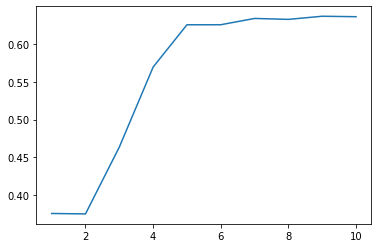

In [ ]:
plt.plot(range(1,11),cvres)

From this, while the $r^2$ technically keeps increasing, it definitely seems like there's very little gained after 5 principal components. 

So, one could build a regression model on the full training set using the first 5 or 6 PCs. We might want to explore those PCs and see if we learn anything. 

In [ ]:
for col,val in zip(X.columns,pca.components_[0]):
    print(col,":",val)

season_end : -0.004462617965939282
career_AST : 0.22717854800849507
career_FG% : 0.2851542679852083
career_FG3% : 0.03782907032698547
career_FT% : 0.12738034280563107
career_G : 0.3611645859216796
career_PER : 0.4216583469468697
career_PTS : 0.3957043683751107
career_TRB : 0.35671289724921695
career_WS : 0.4023642724832658
career_eFG% : 0.29305372892374576
num_ht : 0.07614965028246931
num_wt : 0.061337774544849843


In [ ]:
for col,val in zip(X.columns,pca.components_[1]):
    print(col,":",val)

season_end : -0.03683794386148123
career_AST : 0.36701724978803457
career_FG% : -0.30043669437201703
career_FG3% : 0.33399464256410566
career_FT% : 0.3536803525563959
career_G : 0.09922113884634684
career_PER : 0.011611742507883334
career_PTS : 0.15120883164807306
career_TRB : -0.23061476761870914
career_WS : 0.07870610347679505
career_eFG% : -0.14387390458427274
num_ht : -0.46426471984314627
num_wt : -0.4566988656356154


PCR helps address overfitting by reducing the number of features (building a less flexible model) and multicolinearity (the principal components are orthogonal so uncorrelated). In this way it is a competitor to Ridge or Lasso regression (similar aims). The downside is interpretability of the model. 

# K-means clustering 

Another task of unsupervised learning is clustering.

Do the data naturally form clusters or groups? Feels a bit like classification except unsupervised means no labels, so no ground truth!

$K$ means is one of the most common (and simplest) methods for clustering (unlabeled) points. Like $K$ nearest neighbors, we have to provide the $K$ which may be entirely unclear (and maybe even inappropriate) in an unsupervised setting. Unlike $KNN$ there's no way to validate the best $K$ since the points are unlabeled.

Also like $knn$, $K$-means uses the geometry of feature space to find clusters. 

Inputs: 
1. A set of points 
2. $K=$ the number of clusters we want to find.

The inputs need to be numerical and usually should be scaled (more on that later, but we are using *distance* in feature space).

In [ ]:
from sklearn import datasets

Let's generate a small toy data set with 3 clusters,

In [ ]:
X,y=datasets.make_blobs(n_samples=100, centers=3, n_features=2,random_state=0)

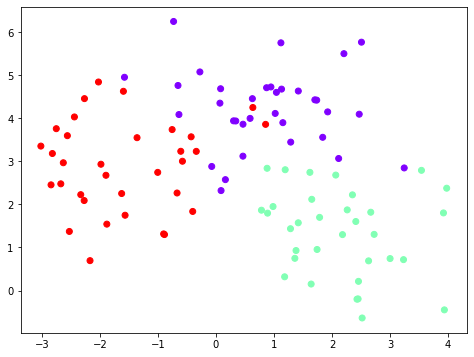

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='rainbow')
plt.show()

Let's import $K$-means and ask it to find 3 clusters.

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

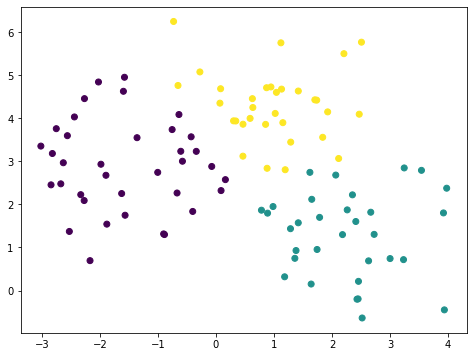

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],c=kmeans.labels_,cmap='viridis')
plt.show()

Not bad! Remember, $K$-means had no idea what the true labels were. It was entirely **unsupervised**.

In [ ]:
pd.crosstab(y,kmeans.labels_,colnames=["K-means"])

K-means,0,1,2
row_0,,,
0,5,1,28
1,0,31,2
2,31,0,2


Labels are meaningless but the "accuracy" is:

In [ ]:
(31+31+28)/(31+31+28+10)

0.9

How does it work?

Algo:

1. Randomly assign each point to one of $K$ clusters.

Then... Repeat until clusters stop changing:

2. Compute the centroid of each cluster. (Average each feature over all points in the cluster.)
3. Re-assign each point to the cluster with the nearest centroid. 

Note: Final clusters can and will depend on the random initialization! By default ```sklearn``` will do 10 random starting distributions and return the best: smallest variance within the clusters. We can (and usually should) increase the number of initializations using ```n_init=```.

Let's plot the K-means decision boundary along with the true class labels.

In [ ]:
xx, yy = np.meshgrid(np.linspace(-3.5, 4.5, 500), np.linspace(-1, 6.5, 500))
X_grid = np.c_[xx.ravel(), yy.ravel()]

In [ ]:
df=pd.DataFrame(X,columns=['feat1','feat2'])
df['Class']=y

In [ ]:
import seaborn as sns

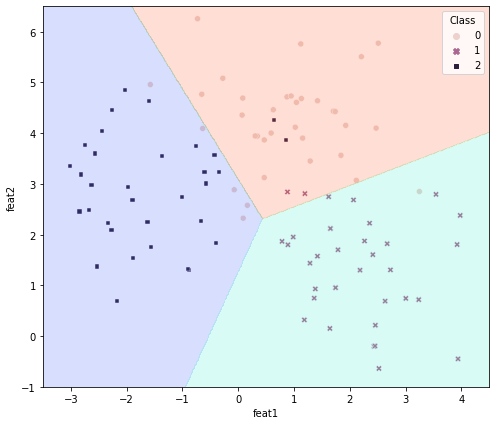

In [ ]:
zz_km = kmeans.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
f, ax = plt.subplots(figsize=(8, 7))
sns.scatterplot(x='feat1',y='feat2',hue='Class',style='Class',data=df)
plt.contourf(xx, yy, zz_km,3,cmap='rainbow',alpha=0.2)
plt.show()

K means can be quite useful and is very common. The regions determined by the k means clusters are convex (roughly round ball-shaped). That means for some problems the clusters will not be what you want or expect.

Example: Our classic moons dataset...

In [ ]:
np.random.seed(1)
mX,my = datasets.make_moons(n_samples=500,noise=.25)
mdf=pd.DataFrame(mX,columns=['feat1','feat2'])
mdf['Class']=my
mdf.head()

,feat1,feat2,Class
0,0.456512,0.071161,1
1,0.984704,-0.593088,1
2,0.935407,0.578138,0
3,0.393591,0.463981,0
4,2.144325,-0.029013,1


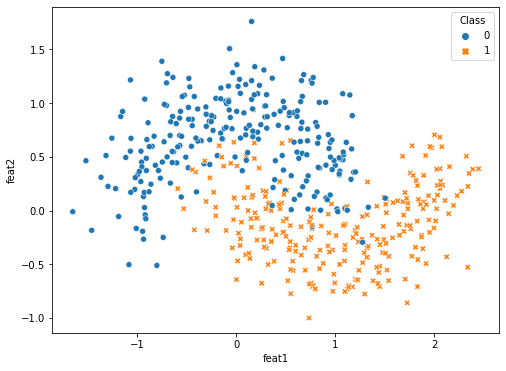

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='feat1',y='feat2',hue='Class',style='Class',data=mdf)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(mX)

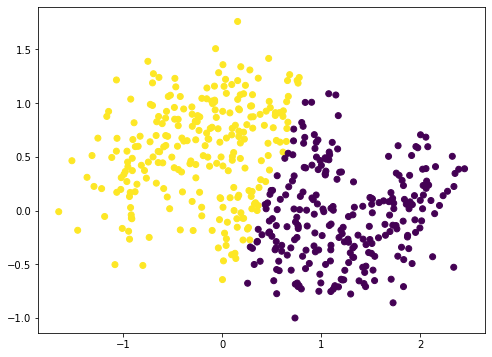

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(mX[:,0],mX[:,1],c=kmeans.labels_,cmap='viridis')
plt.show()

Makes sense given the kmeans algo but not necessarily what we wanted. (Also, if we aren't in a nice simple, easy to visualize 2-D feature space we probably have no idea what we want! )

Non-convexity of the natural underlying clusters is a problem for K-Means.

In [ ]:
kmeans.cluster_centers_

array([[ 1.2297513 , -0.04529791],
       [-0.21798388,  0.55379735]])

In [ ]:
kmeans.cluster_centers_[0]

array([ 1.2297513 , -0.04529791])

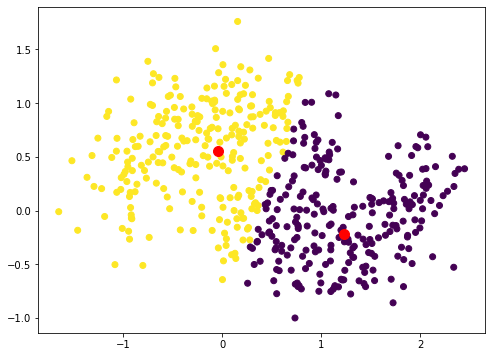

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(mX[:,0],mX[:,1],c=kmeans.labels_,cmap='viridis')
plt.plot(kmeans.cluster_centers_[0],kmeans.cluster_centers_[1],"ro",markersize=10) 
plt.show()

Remember, we had to provide $K$. If we thought there werer 3 clusters...

In [ ]:
kmeans3 = KMeans(n_clusters=3, random_state=0).fit(mX)

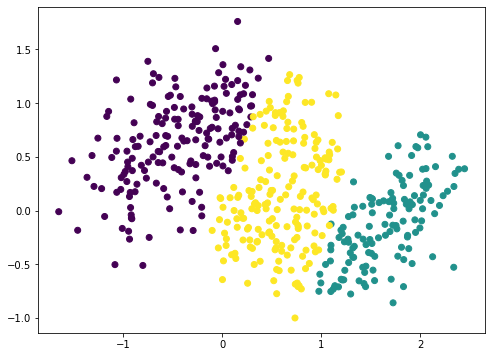

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(mX[:,0],mX[:,1],c=kmeans3.labels_,cmap='viridis')
plt.show()

In [ ]:
kmeans3.cluster_centers_[:,0]

array([-0.44267152,  1.65087873,  0.60456206])

In [ ]:
#x-coordinates of cluster centers
cx=kmeans3.cluster_centers_[:,0]
#y-coordinates of cluster centers
cy=kmeans3.cluster_centers_[:,1]

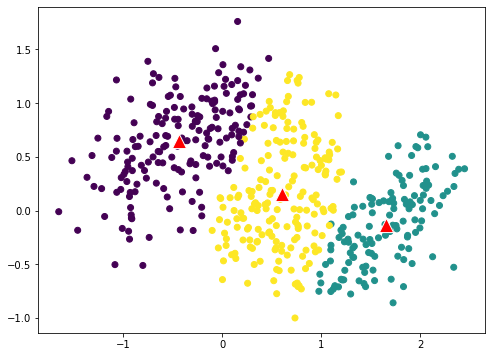

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(mX[:,0],mX[:,1],c=kmeans3.labels_,cmap='viridis')
plt.scatter(cx,cy,marker="^",c='r',s=200,edgecolor='w')
plt.show()

In [ ]:
kmeans3.cluster_centers_

array([[-0.44267152,  0.64407721],
       [ 1.65087873, -0.13202208],
       [ 0.60456206,  0.15692262]])

### Choosing K

Sometimes there is a "more correct" value for $K$ and we might be able to uncover it.

In [ ]:
X,y=datasets.make_blobs(n_samples=300, centers=4, n_features=2,cluster_std=0.75,random_state=0)

Here there are 4 clusters with noise.

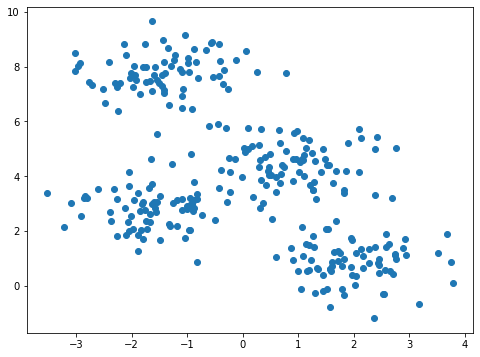

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1])
plt.show()

Idea: 

For a given value of $k$, compute the (squared) distance between each point and it's cluster center. Find the mean of all those squared distances. Increase $k$ and repeat. As the number of cluster centers increases, the MSE should decrease.  

The decrease in MSE should be significant as $k$ increases from 1 and approaches an optimal value. Once we pass the "optimal" value of $k$, the MSE decrease should level off and larger values of $K$ won't help much. Thus, we look for the ***elbow*** in the graph of MSE. 

Here's a function to find the MSE for a user-defined range of $k$-values.

Input: The points and max $k$.

Output: MSE for $k=1,2,\ldots$ max $k$.  

In [ ]:
def km_mse(inputs,k):
    mse=[]
    for i in range(1,k):
        errors=[]
        kmeans = KMeans(n_clusters=i, n_init=50,random_state=0).fit(inputs)
        for pt,lab in zip(inputs,kmeans.labels_):
            errors.append(np.linalg.norm(pt-kmeans.cluster_centers_[lab])**2)
        mse.append(np.mean(errors))
    return mse

In [ ]:
out=km_mse(X,10)

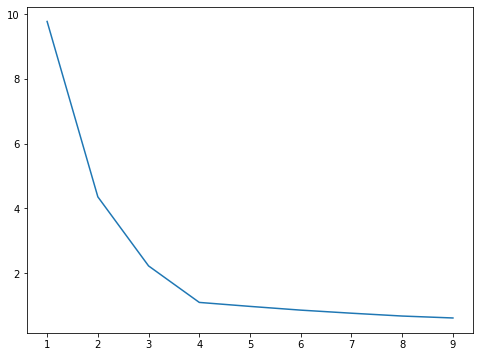

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(list(range(1,10)),out)
plt.show()

This identifies $k=4$ (which is correct).

MSE will always decrease so we're looking for the point of diminishing returns.

In [ ]:
kmeans = KMeans(n_clusters=4,random_state=0).fit(X)

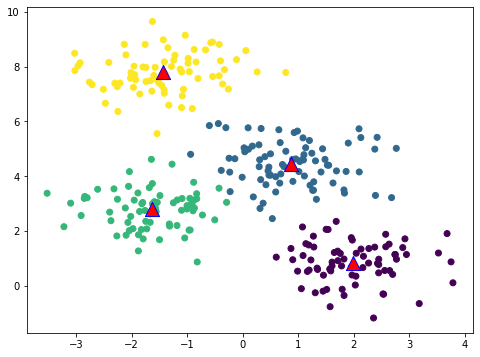

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],c=kmeans.labels_,cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker="^",edgecolors='b',c='r',s=200) 
plt.show()

Try determing K on (2022 season) of nba data? For instance, are there 5 natural "positions" into which players cluster?

In [ ]:
nba=pd.read_csv('/content/drive/MyDrive/Data 599/nba2022_per100poss.csv')

In [ ]:
nba.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,TRB,AST,STL,BLK,TOV,PF,PTS,Unnamed: 29,ORtg,DRtg
0,1,Precious Achiuwa\achiupr01,C,22,TOR,73,28,1725,7.7,17.5,...,13.7,2.4,1.1,1.2,2.4,4.4,19.2,NaN,105.0,110
1,2,Steven Adams\adamsst01,C,28,MEM,76,75,1999,5.0,9.2,...,18.2,6.1,1.6,1.4,2.8,3.7,12.6,NaN,125.0,108
2,3,Bam Adebayo\adebaba01,C,24,MIA,56,56,1825,11.1,20.0,...,15.5,5.2,2.2,1.2,4.1,4.7,29.3,NaN,117.0,104
3,4,Santi Aldama\aldamsa01,PF,21,MEM,32,0,360,7.0,17.5,...,11.6,2.8,0.8,1.3,2.1,4.8,17.5,NaN,101.0,111
4,5,LaMarcus Aldridge\aldrila01,C,36,BRK,47,12,1050,11.6,21.1,...,11.9,1.9,0.6,2.2,2.0,3.6,28.0,NaN,119.0,112


In [ ]:
nba=nba.drop(["Rk","Unnamed: 29"],axis=1)

In [ ]:
nba.isna().sum()

Player     0
Pos        0
Age        0
Tm         0
G          0
GS         0
MP         0
FG         0
FGA        0
FG%       15
3P         0
3PA        0
3P%       72
2P         0
2PA        0
2P%       28
FT         0
FTA        0
FT%       97
ORB        0
DRB        0
TRB        0
AST        0
STL        0
BLK        0
TOV        0
PF         0
PTS        0
ORtg      10
DRtg       0
dtype: int64

In [ ]:
nba22=nba.dropna().copy()
#nba.fillna(0,inplace=True)

In [ ]:
nba22.isna().sum()

Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
ORtg      0
DRtg      0
Name      0
dtype: int64

Fix player names which have an ID tag along with the name.

In [ ]:
def name(row):
    return row['Player'].split("\\")[0]

In [ ]:
nba22['Name']=nba22.apply(name,axis=1)

In [ ]:
nba22[['Name','Player']].head()

,Name,Player
0,Precious Achiuwa,Precious Achiuwa\achiupr01
1,Steven Adams,Steven Adams\adamsst01
2,Bam Adebayo,Bam Adebayo\adebaba01
3,Santi Aldama,Santi Aldama\aldamsa01
4,LaMarcus Aldridge,LaMarcus Aldridge\aldrila01


In [ ]:
nba.MP.describe()

count     812.000000
mean      825.188424
std       775.786331
min         1.000000
25%       121.000000
50%       577.500000
75%      1414.500000
max      2854.000000
Name: MP, dtype: float64

Filter on 100 MP

In [ ]:
nba100=nba22[nba22['MP']>=100].copy()

In [ ]:
nba100.shape

(601, 31)

In [ ]:
X_tmp100=nba100.drop(['Name','Pos','Tm','Player'],axis=1)
y100=nba100[['Name','Pos','Tm']]

In [ ]:
X_tmp100.columns

Index(['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P',
       '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS', 'ORtg', 'DRtg'],
      dtype='object')

If we're thinking about positions, maybe some columns matter more than others-- for instance, whether or not you're good (FG%) may not matter as much as how many shots you take. Maybe we shouldn't filter on MP... riding the bench is kind of a position. Or not... but this is EDA.

And again scales are very different. Not good for an algorithm that uses distance.

In [ ]:
X_tmp100.mean()

Age       26.257903
G         46.743760
GS        22.083195
MP      1083.823627
FG         7.526955
FGA       16.809151
FG%        0.447744
3P         2.356739
3PA        6.891847
3P%        0.322659
2P         5.172879
2PA        9.918636
2P%        0.514105
FT         3.043927
FTA        3.994509
FT%        0.761880
ORB        2.207654
DRB        6.674043
TRB        8.882363
AST        4.619967
STL        1.551414
BLK        0.948586
TOV        2.543760
PF         4.286522
PTS       20.453411
ORtg     110.299501
DRtg     112.565724
dtype: float64

In [ ]:
from sklearn.preprocessing import StandardScaler 

In [ ]:
scaler = StandardScaler().fit(X_tmp100)
X_scaled=scaler.transform(X_tmp100)

In [ ]:
X_scaled.shape

(601, 27)

In [ ]:
nba_out=km_mse(X_scaled,25)

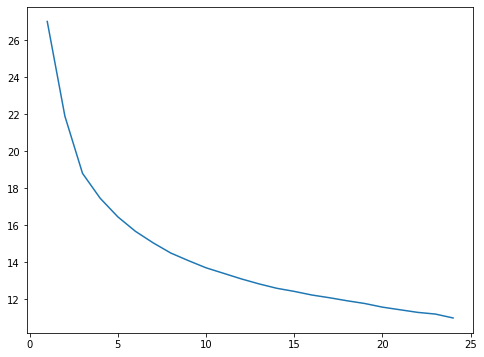

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(list(range(1,25)),nba_out)
plt.show()

Where is the elbow? :(

In [ ]:
nba_out

[27.0,
 21.885737853542533,
 18.793489975102304,
 17.44949685463231,
 16.446550054850277,
 15.66253846642518,
 15.041883343190076,
 14.491514141687949,
 14.08045063970342,
 13.692526966738344,
 13.393319037843405,
 13.093222868326816,
 12.824279383966678,
 12.588046405231633,
 12.417935523396576,
 12.222343221910268,
 12.075249505011643,
 11.910854285954382,
 11.763463683613276,
 11.566838051885266,
 11.42540854629528,
 11.28419930514753,
 11.193307553559505,
 10.982424503890101]

No clear answer here, unfortunately. Also no indication that the correct number is 5. Also not clear that 15 positions would be particularly useful-- could inclde very small clusters.

Let's look at $K=8$...

In [ ]:
nba_kmeans8 = KMeans(n_clusters=8,n_init=20,random_state=0).fit(X_scaled)

In [ ]:
for i in range(8):
    print(i+1,":",(nba_kmeans8.labels_==i).sum())

1 : 87
2 : 64
3 : 37
4 : 84
5 : 86
6 : 109
7 : 38
8 : 96


Only 37 folks in the 3rd cluster.

In [ ]:
nba_kmeans10 = KMeans(n_clusters=10,n_init=30,random_state=0).fit(X_scaled)
for i in range(10):
    print(i+1,":",(nba_kmeans10.labels_==i).sum())

1 : 40
2 : 75
3 : 80
4 : 77
5 : 30
6 : 23
7 : 60
8 : 78
9 : 91
10 : 47


In [ ]:
nba_kmeans6 = KMeans(n_clusters=6,n_init=30,random_state=0).fit(X_scaled)
for i in range(6):
    print(i+1,":",(nba_kmeans6.labels_==i).sum())

1 : 81
2 : 57
3 : 121
4 : 93
5 : 113
6 : 136


In [ ]:
nba_kmeans7 = KMeans(n_clusters=7,n_init=30,random_state=0).fit(X_scaled)
for i in range(7):
    print(i+1,":",(nba_kmeans7.labels_==i).sum())

1 : 98
2 : 42
3 : 125
4 : 58
5 : 116
6 : 74
7 : 88


In [ ]:
nba_kmeans5 = KMeans(n_clusters=5,n_init=30,random_state=0).fit(X_scaled)
for i in range(5):
    print(i+1,":",(nba_kmeans5.labels_==i).sum())

1 : 146
2 : 133
3 : 104
4 : 50
5 : 168


In [ ]:
nba_kmeans3 = KMeans(n_clusters=3,n_init=30,random_state=0).fit(X_scaled)
for i in range(3):
    print(i+1,":",(nba_kmeans3.labels_==i).sum())

1 : 145
2 : 314
3 : 142


In [ ]:
for col,val in zip(X_tmp100.columns,nba_kmeans6.cluster_centers_[0]):
    print(col,":",np.round(val,3))

Age : -0.108
G : -0.559
GS : -0.609
MP : -0.61
FG : -0.248
FGA : 0.02
FG% : -0.505
3P : -0.416
3PA : -0.29
3P% : -0.277
2P : -0.004
2PA : 0.257
2P% : -0.536
FT : -0.09
FTA : -0.056
FT% : -0.124
ORB : -0.501
DRB : -0.528
TRB : -0.568
AST : 1.008
STL : 0.729
BLK : -0.421
TOV : 0.803
PF : -0.05
PTS : -0.299
ORtg : -0.812
DRtg : 0.123


In [ ]:
for col,val in zip(X_tmp100.columns,nba_kmeans6.cluster_centers_[3]):
    print(col,":",np.round(val,3))

Age : -0.176
G : -0.01
GS : 0.017
MP : -0.136
FG : 0.62
FGA : -0.108
FG% : 1.424
3P : -1.195
3PA : -1.259
3P% : -0.724
2P : 1.217
2PA : 0.913
2P% : 0.965
FT : 0.457
FTA : 0.711
FT% : -0.673
ORB : 1.696
DRB : 1.278
TRB : 1.583
AST : -0.486
STL : -0.239
BLK : 1.096
TOV : 0.238
PF : 1.046
PTS : 0.333
ORtg : 0.831
DRtg : -0.686


In [ ]:
for col,val in zip(X_tmp100.columns,nba_kmeans6.cluster_centers_[5]):
    print(col,":",np.round(val,3))

Age : 0.031
G : 0.678
GS : 0.515
MP : 0.776
FG : 0.302
FGA : 0.501
FG% : -0.188
3P : 0.952
3PA : 0.848
3P% : 0.473
2P : -0.235
2PA : -0.169
2P% : -0.162
FT : 0.03
FTA : -0.094
FT% : 0.524
ORB : -0.677
DRB : -0.553
TRB : -0.661
AST : 0.046
STL : -0.192
BLK : -0.535
TOV : -0.211
PF : -0.574
PTS : 0.434
ORtg : 0.125
DRtg : 0.425


Could spin a story around these cluster centers. Cluster 3 = ?

In [ ]:
y100[(nba_kmeans.labels_== 3)].head(20)

,Name,Pos,Tm
0,Precious Achiuwa,C,TOR
2,Bam Adebayo,C,MIA
4,LaMarcus Aldridge,C,BRK
9,Jarrett Allen,C,CLE
27,Deandre Ayton,C,PHO
29,Marvin Bagley III,PF,TOT
30,Marvin Bagley III,PF,SAC
31,Marvin Bagley III,PF,DET
34,Mo Bamba,C,ORL
60,Goga Bitadze,C,IND


Another application...

### Vector quantization

In [ ]:
import matplotlib.image as mpimg

In [ ]:
img=mpimg.imread('/content/drive/MyDrive/Data 599/K_fish.png')

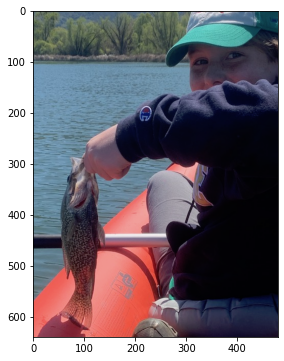

In [ ]:
plt.figure(figsize=(8,6))
plt.imshow(img)
plt.show()

In [ ]:
img.shape

(640, 480, 4)

So, this image is 640 (rows) by 480 (columns) by 4. Each pixel in row $i$ and column $j$ has 4 values:

In [ ]:
#rows
img[:,0,0].shape

(640,)

In [ ]:
#columns
img[0,:,0].shape

(480,)

In [ ]:
#pixel
img[0,0,:].shape

(4,)

Here's the (0,0) pixel:

In [ ]:
img[0][0]

array([0.32156864, 0.40784314, 0.49411765, 1.        ], dtype=float32)

The first three values are r,g,b intensities. The fourth value is about transparency so let's drop it.

In [ ]:
img=img[:,:,0:3]

In [ ]:
img.shape

(640, 480, 3)

Should look the same...

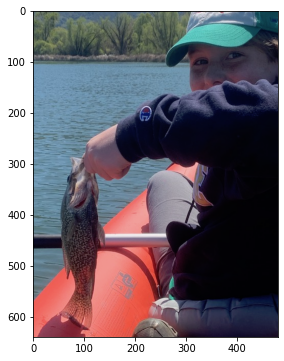

In [ ]:
plt.figure(figsize=(8,6))
plt.imshow(img)
plt.show()

Each pixel has an r,g,b value that gives the pixel its color. Suppose we need to reproduce the image but we can only use 5 total colors. This could be a job for $K$-means. Find the five cluster centers in rgb space and use the closest one to the pixel value for each pixel. 

In [ ]:
img.shape

(640, 480, 3)

Let's flatten this 3D array into a 2D array where each row is a pixel, and the columns represent the r,g,b values of that pixel.

In [ ]:
X_img = img.reshape(640*480,3)

In [ ]:
X_img.shape

(307200, 3)

In [ ]:
X_img[0] == img[0,0]

array([ True,  True,  True])

So the first row of X_img is the same as the first pixel in the image. Good. The 480th row should be first pixel in row 2 (python counting row 1) of the original. 

In [ ]:
img[1,0]==X_img[480]

array([ True,  True,  True])

Perfect. Let's cluster into 5 clusters.

In [ ]:
fish_km=KMeans(n_clusters=5,n_init=20,random_state=0).fit(X_img)

In [ ]:
fish_km.cluster_centers_

array([[0.22762787, 0.19295269, 0.2539643 ],
       [0.46990126, 0.5855233 , 0.65759873],
       [0.9078354 , 0.46352804, 0.4368406 ],
       [0.0275445 , 0.0210298 , 0.0700022 ],
       [0.40043062, 0.38264024, 0.405652  ]], dtype=float32)

Each pixel (row) has a label which is the closest centroid:

In [ ]:
fish_km.labels_.shape

(307200,)

For example, pixels 300 through 350:

In [ ]:
fish_km.labels_[300:350]

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int32)

Did we use all 5 colors?

In [ ]:
for i in range(5):
    print(i,":",((fish_km.labels_==i).sum()/307200).round(3))

0 : 0.177
1 : 0.242
2 : 0.104
3 : 0.289
4 : 0.189


Yep. OK now, let's assign each pixel to have color equal to its closest centroid color. Take the cluster center values (rgb coords) of the closest centroid for every pixel.

In [ ]:
new_img=[fish_km.cluster_centers_[lab] for lab in fish_km.labels_]

Then reshape back into the original array size: 640 by 480 by 3.

In [ ]:
new_img=np.array(new_img).reshape((640,480,3))

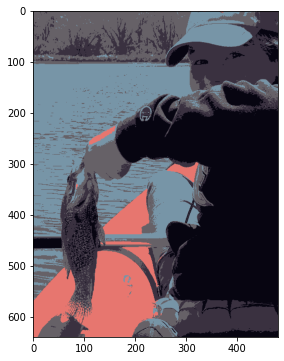

In [ ]:
plt.figure(figsize=(8,6))
plt.imshow(new_img)
plt.show()

In [ ]:
images=[new_img,img]

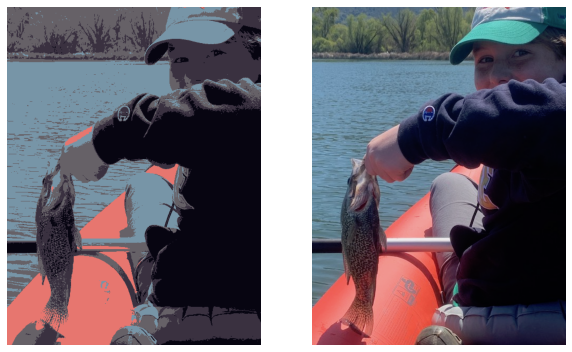

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 9))
for ax, image in zip(axes, images):
    ax.set_axis_off()
    ax.imshow(image)

## Agglomerative (Heierarchical) Clustering

Another (and pretty different) approach to clustering

Basic idea is start with every point in its own cluster and then merge clusters together based on some notion of distance.

In [ ]:
X,y=datasets.make_blobs(n_samples=12, centers=4, n_features=2,cluster_std=0.75,random_state=0)
labs=list(range(12))

In [ ]:
labs

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

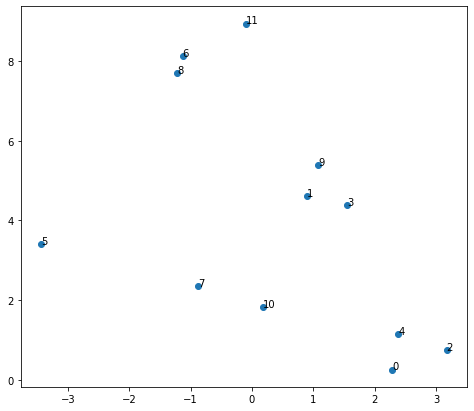

In [ ]:
fig, ax = plt.subplots(figsize=(8,7))
xx=X[:,0]
yy=X[:,1]
ax.scatter(xx,yy)
for i,txt in enumerate(labs):
    ax.annotate(txt, (xx[i], yy[i]))
plt.show()

So, you might start by deciding that points 6 and 8 are close togteher and belong in the same cluster. 

Then join 1--9. Then what? Well, then maybe 3 should join the cluster with 1 and 9. Then join 0--4, Etc. 

Important question: we need to decide what the distance is between a point and a cluster (or between two clusters). 

There are lots of options like: *max distance between any 2 points in the cluster*. Once we have a distance we can draw a picture of the joining process using a ***dendrogram***. Unfortunately, ```sklearn``` doesn't have a dendrogram draw-er but ```scipy``` does: 

In [ ]:
from scipy.cluster.hierarchy import linkage,dendrogram,ward 
from sklearn.cluster import AgglomerativeClustering

We'll use something called ward distance -- more soon.

In [ ]:
linkage_array = ward(X)

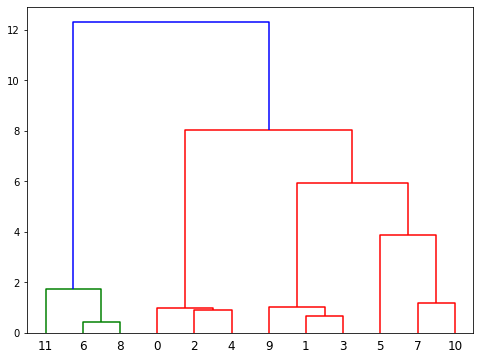

In [ ]:
plt.figure(figsize=(8,6))
dn = dendrogram(linkage_array)
plt.show()

Here's the original cluster labels (from the data generation)...

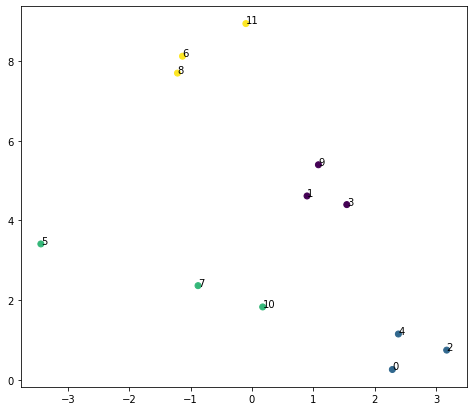

In [ ]:
fig, ax = plt.subplots(figsize=(8,7))
ax.scatter(X[:,0],X[:,1],c=y,cmap='viridis')
for i,txt in enumerate(labs):
    ax.annotate(txt, (xx[i], yy[i]))
plt.show()

If you cut the dendrogram around 5 to get 4 clusters, then the hierarchical clustering algorithm got it correct. Note that joining 5 to the 7--10 cluster happened last b/c they were "furthest" apart.

In [ ]:
X,y=datasets.make_blobs(n_samples=30, centers=4, n_features=2,cluster_std=0.75,random_state=0)
labs=list(range(30))

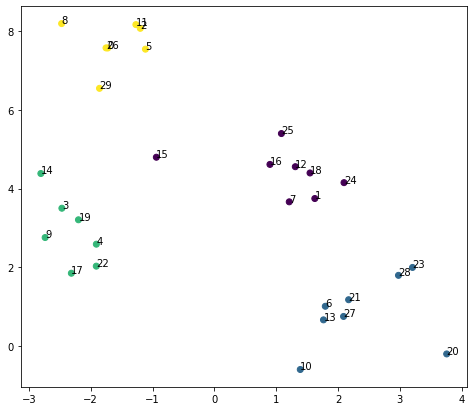

In [ ]:
fig, ax = plt.subplots(figsize=(8,7))
xx=X[:,0]
yy=X[:,1]
ax.scatter(xx,yy,c=y,cmap='viridis')
for i,txt in enumerate(labs):
    ax.annotate(txt, (xx[i], yy[i]))
plt.show()

In [ ]:
linkage_array=ward(X)

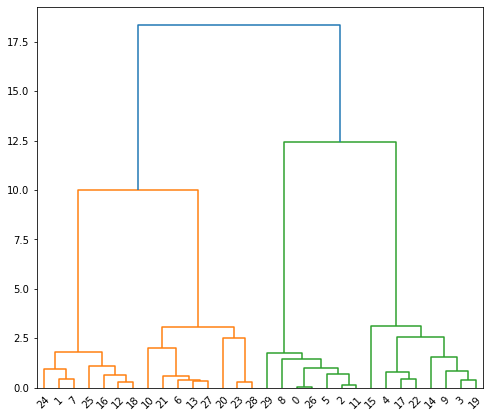

In [ ]:
plt.figure(figsize=(8,7))
dn = dendrogram(linkage_array)
plt.show()

Here's how to cluster and then access the clusters:

In [ ]:
hierarchical_clustering_example = AgglomerativeClustering(4).fit(X)

In [ ]:
hierarchical_clustering_example.labels_[0:10]

array([2, 3, 2, 0, 0, 2, 1, 3, 2, 0])

Can put everything together in a dataframe:

In [ ]:
hc_results=pd.DataFrame(X,columns=['feat1','feat2'])
hc_results['Cluster_Assignment']=hierarchical_clustering_example.labels_

In [ ]:
hc_results[hc_results['Cluster_Assignment']==3]

,feat1,feat2,Cluster_Assignment
1,1.624597,3.747164,3
7,1.211071,3.663216,3
12,1.309168,4.554043,3
16,0.898856,4.611736,3
18,1.547048,4.395044,3
24,2.096829,4.149919,3
25,1.084303,5.394492,3


Different notions of distance give different dendrograms and potentially different clusters.

In [ ]:
Z = linkage(X, 'complete')

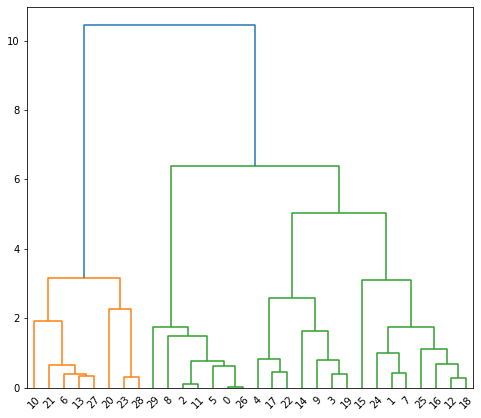

In [ ]:
plt.figure(figsize=(8,7))
dn = dendrogram(Z)
plt.show()

### Distances:

1. Average: Mean of all pairwise distances between points in the respective clusters.
2. Single: Minimum of all pairwise distances between points in the respective clusters.  
3. Centroid: Distance between existing cluster centroids. 
4. Complete: Maximum of all pairwise distances between points in the respective clusters.
5. Ward: Merges the two clusters for which the variance within all clusters increases the least.

Ward is default in ```sklearn```. Complete and average are commonly used. Single can be used to create "strings" of points..

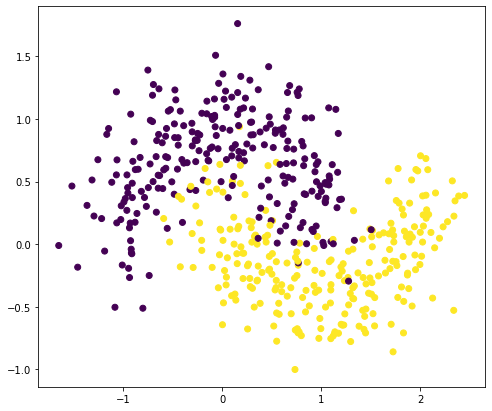

In [ ]:
plt.figure(figsize=(8,7))
plt.scatter(mX[:,0],mX[:,1],c=my)
plt.show()

In [ ]:
hclust = AgglomerativeClustering(2).fit(mX)

In [ ]:
hclust.labels_[0:10]

array([1, 1, 0, 0, 1, 1, 1, 0, 0, 0])

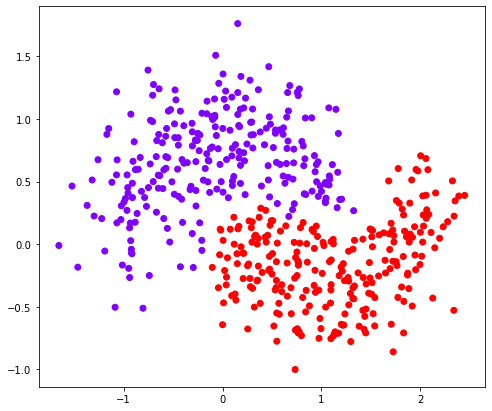

In [ ]:
plt.figure(figsize=(8,7))
plt.scatter(mX[:,0],mX[:,1],c=hclust.labels_,cmap='rainbow')
plt.show()

In [ ]:
np.random.seed(1)
nmX,nmy = datasets.make_moons(n_samples=500,noise=.1)
nmdf=pd.DataFrame(nmX,columns=['feat1','feat2'])
nmdf['Class']=nmy
nmdf.head()

,feat1,feat2,Class
0,0.316556,-0.049422,1
1,0.740883,-0.481286,1
2,0.871726,0.566562,0
3,0.555528,0.634506,0
4,2.038729,0.138594,1


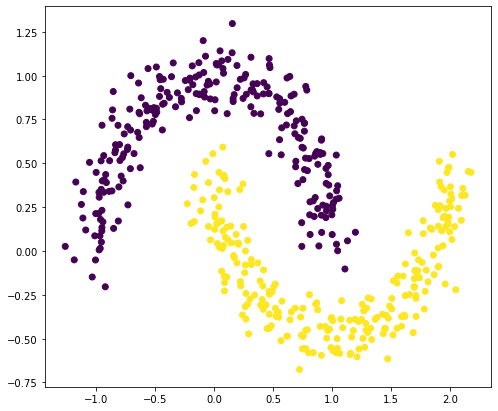

In [ ]:
plt.figure(figsize=(8,7))
plt.scatter(nmX[:,0],nmX[:,1],c=nmy)
plt.show()

In [ ]:
hclust = AgglomerativeClustering(2).fit(nmX)

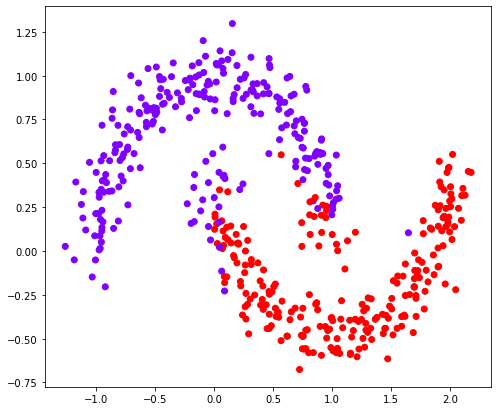

In [ ]:
plt.figure(figsize=(8,7))
plt.scatter(nmX[:,0],nmX[:,1],c=hclust.labels_,cmap='rainbow')
plt.show()

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score

In [ ]:
adjusted_rand_score(nmy,hclust.labels_)

0.6521671185646941

In [ ]:
mkm=KMeans(2,n_init=20,random_state=0).fit(nmX)

In [ ]:
adjusted_rand_score(nmy,mkm.labels_)

0.2606624564610498

ARS is like accuracy without fixing labels (so 00110 = 11001) and where adjusted means it penalizes slightly for what you'd be expected to get by random guessing. 

In [ ]:
adjusted_rand_score(nmy,np.random.randint(2,size=len(nmy)))

0.0011446627832693405

In [ ]:
shclust = AgglomerativeClustering(2,linkage='single').fit(nmX)

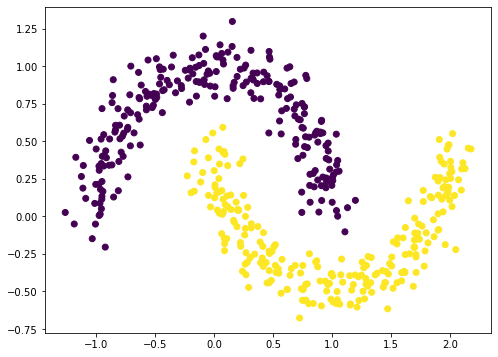

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(nmX[:,0],nmX[:,1],c=shclust.labels_)
plt.show()

In [ ]:
adjusted_rand_score(nmy,shclust.labels_)

1.0

In [ ]:
chclust = AgglomerativeClustering(2,linkage='average').fit(nmX)

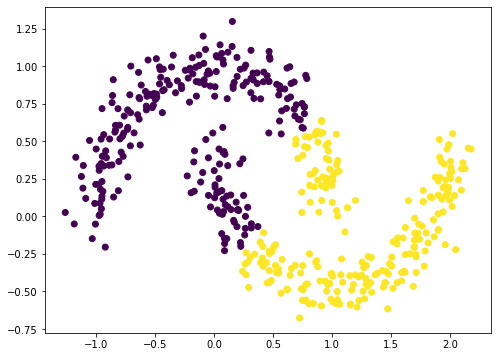

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(nmX[:,0],nmX[:,1],c=chclust.labels_)
plt.show()

#### Sandbox

Play around with Unsupervised methods on the nba data above. For example, compare the K-means clusters. How do they agree / disagree ?

Or run the PCR model using the PCs we found above.

Or, make clusters of the face data set and try vector quantization on them. 
Or try clustering the countries data set from the HW.

In [ ]:
cntry=pd.read_csv('Country-data.csv')

In [ ]:
cntry.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
Xc=cntry.drop('country',axis=1)

In [ ]:
X_scaled = StandardScaler().fit_transform(Xc)

In [ ]:
X_scaled[0]

array([ 1.29153238, -1.13827979,  0.27908825, -0.08245496, -0.8082454 ,
        0.15733622, -1.61909203,  1.90288227, -0.67917961])

In [ ]:
cntry_out=km_mse(X_scaled,15)

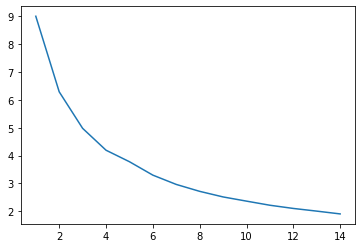

In [ ]:
plt.plot(list(range(1,15)),cntry_out)

In [ ]:
ckm=KMeans(3,n_init=20,random_state=0).fit(X_scaled)

In [ ]:
(ckm.labels_==2).sum()

36

In [ ]:
cntry[(ckm.labels_==2)]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400
42,Cyprus,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800
43,Czech Republic,3.4,66.0,7.88,62.9,28300,-1.430,77.5,1.51,19800
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200


In [ ]:
dists=ckm.transform(X_scaled)

In [ ]:
dists.min(axis=1)

array([1.0860896 , 0.83703077, 1.41463189, 2.26757607, 1.06253633,
       2.16492481, 1.11510231, 2.00759372, 0.94183635, 1.52274842,
       1.68758762, 2.02504056, 1.94460476, 1.24265752, 1.33911565,
       1.37769631, 1.13272617, 1.50221812, 1.23075706, 1.22191063,
       2.12778387, 2.08406692, 2.15192977, 3.34128905, 0.98951342,
       1.17017106, 2.22240103, 1.4520673 , 1.33956002, 1.69961731,
       1.30061031, 2.49759111, 2.01083439, 1.35547273, 1.34879363,
       1.70376398, 1.43926382, 1.64836911, 2.78187018, 2.04456929,
       1.23061078, 1.33537793, 1.43959575, 1.74206318, 1.35482071,
       0.9901896 , 1.15820036, 1.45066188, 0.81123404, 3.17659798,
       2.07996149, 1.91604641, 1.44474352, 1.03576473, 1.96908369,
       2.21637962, 1.21744664, 1.52518353, 1.38732897, 0.9783515 ,
       2.10106938, 0.95351859, 1.17280684, 0.82908781, 1.46708697,
       1.74285923, 4.50744553, 2.29427216, 0.7317642 , 1.85635272,
       1.9870466 , 1.61225672, 2.01663973, 2.28339577, 1.84384

In [ ]:
cntry['dist_to_centroid']=dists.min(axis=1)

In [ ]:
cntry.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,dist_to_centroid
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1.086090
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0.837031
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1.414632
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2.267576
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1.062536


In [ ]:
cntry.sort_values(by='dist_to_centroid',ascending=False).head(30)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,dist_to_centroid
113,Nigeria,130.0,25.300,5.07,17.4000,5150,104.000,60.5,5.84,2330,8.869483
133,Singapore,2.8,200.000,3.96,174.0000,72100,-0.046,82.7,1.15,46600,7.606895
91,Luxembourg,2.8,175.000,7.77,142.0000,91700,3.620,81.3,1.63,105000,7.054849
98,Malta,6.8,153.000,8.65,154.0000,28300,3.830,80.3,1.36,21100,5.674980
123,Qatar,9.0,62.300,1.81,23.8000,125000,6.980,79.5,2.07,70300,5.238186
66,Haiti,208.0,15.300,6.91,64.7000,1500,5.450,32.1,3.33,662,4.507446
159,United States,7.3,12.400,17.90,15.8000,49400,1.220,78.7,1.93,48400,4.035843
163,Venezuela,17.1,28.500,4.91,17.6000,16500,45.900,75.4,2.47,13500,3.930755
87,Lesotho,99.7,39.400,11.10,101.0000,2380,4.150,46.5,3.30,1170,3.596154
131,Seychelles,14.4,93.800,3.40,108.0000,20400,-4.210,73.4,2.17,10800,3.565261


In [ ]:
cntry.sort_values(by='dist_to_centroid',ascending=False).tail(30)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,dist_to_centroid
46,Ecuador,25.1,27.9,8.06,32.4,9350,7.470,76.7,2.66,4660,1.158200
16,Belize,18.8,58.2,5.20,57.5,7880,1.140,71.4,2.71,4340,1.132726
156,Ukraine,11.7,47.1,7.72,51.1,7820,13.400,70.4,1.44,2970,1.121004
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,1.115102
100,Mauritius,15.0,51.2,6.00,62.2,15900,1.130,73.4,1.57,8000,1.109045
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,1.086090
166,Zambia,83.1,37.0,5.89,30.9,3280,14.000,52.0,5.40,1460,1.077681
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,1.062536
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200,1.035765
92,"Macedonia, FYR",10.4,39.8,7.09,58.1,11400,2.040,74.0,1.47,4540,0.999721


In [ ]:
cntry['cluster']=ckm.labels_

In [ ]:
cntry.head(30)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,dist_to_centroid,cluster
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,1.086090,0
1,Albania,16.6,28.00,6.55,48.6,9930,4.490,76.3,1.65,4090,0.837031,1
2,Algeria,27.3,38.40,4.17,31.4,12900,16.100,76.5,2.89,4460,1.414632,1
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,2.267576,0
4,Antigua and Barbuda,10.3,45.50,6.03,58.9,19100,1.440,76.8,2.13,12200,1.062536,1
5,Argentina,14.5,18.90,8.10,16.0,18700,20.900,75.8,2.37,10300,2.164925,1
6,Armenia,18.1,20.80,4.40,45.3,6700,7.770,73.3,1.69,3220,1.115102,1
7,Australia,4.8,19.80,8.73,20.9,41400,1.160,82.0,1.93,51900,2.007594,2
8,Austria,4.3,51.30,11.00,47.8,43200,0.873,80.5,1.44,46900,0.941836,2
9,Azerbaijan,39.2,54.30,5.88,20.7,16000,13.800,69.1,1.92,5840,1.522748,1


In [ ]:
cntry[cntry['cluster']==2].sort_values(by='dist_to_centroid',ascending=False).head(30)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,dist_to_centroid,cluster
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,7.606895,2
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,7.054849,2
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100,5.674980,2
123,Qatar,9.0,62.3,1.81,23.8,125000,6.980,79.5,2.07,70300,5.238186,2
159,United States,7.3,12.4,17.90,15.8,49400,1.220,78.7,1.93,48400,4.035843,2
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,3.341289,2
82,Kuwait,10.8,66.7,2.63,30.4,75200,11.200,78.2,2.21,38500,3.026521,2
114,Norway,3.2,39.7,9.48,28.5,62300,5.950,81.0,1.95,87800,2.910954,2
157,United Arab Emirates,8.6,77.7,3.66,63.6,57600,12.500,76.5,1.87,35000,2.422982,2
77,Japan,3.2,15.0,9.49,13.6,35800,-1.900,82.8,1.39,44500,2.387977,2


In [ ]:
cntry[cntry['cluster']==2].sort_values(by='dist_to_centroid',ascending=False).tail(30)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,dist_to_centroid,cluster
82,Kuwait,10.8,66.7,2.63,30.4,75200,11.200,78.2,2.21,38500,3.026521,2
114,Norway,3.2,39.7,9.48,28.5,62300,5.950,81.0,1.95,87800,2.910954,2
157,United Arab Emirates,8.6,77.7,3.66,63.6,57600,12.500,76.5,1.87,35000,2.422982,2
77,Japan,3.2,15.0,9.49,13.6,35800,-1.900,82.8,1.39,44500,2.387977,2
73,Ireland,4.2,103.0,9.19,86.5,45700,-3.220,80.4,2.05,48700,2.283396,2
134,Slovak Republic,7.0,76.3,8.79,77.8,25200,0.485,75.5,1.43,16600,2.259888,2
145,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600,2.117966,2
60,Greece,3.9,22.1,10.30,30.7,28700,0.673,80.4,1.48,26900,2.101069,2
122,Portugal,3.9,29.9,11.00,37.4,27200,0.643,79.8,1.39,22500,2.076754,2
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700,2.025041,2


In [ ]:
cntry[cntry['cluster']==0].sort_values(by='dist_to_centroid',ascending=False).head(30)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,dist_to_centroid,cluster
113,Nigeria,130.0,25.30,5.07,17.4,5150,104.000,60.5,5.84,2330,8.869483,0
66,Haiti,208.0,15.30,6.91,64.7,1500,5.450,32.1,3.33,662,4.507446,0
87,Lesotho,99.7,39.40,11.10,101.0,2380,4.150,46.5,3.30,1170,3.596154,0
49,Equatorial Guinea,111.0,85.80,4.48,58.9,33700,24.900,60.9,5.21,17100,3.176598,0
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.200,55.0,5.20,399,3.098853,0
88,Liberia,89.3,19.10,11.80,92.6,700,5.470,60.8,5.02,327,2.973611,0
81,Kiribati,62.7,13.30,11.30,79.9,1730,1.520,60.7,3.84,1490,2.859599,0
38,"Congo, Rep.",63.9,85.10,2.46,54.7,5190,20.700,60.4,4.95,2740,2.781870,0
149,Timor-Leste,62.6,2.20,9.12,27.8,1850,26.500,71.1,6.23,3600,2.695969,0
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,2.497591,0


In [ ]:
cntry[cntry['cluster']==0].sort_values(by='dist_to_centroid',ascending=False).tail(30)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,dist_to_centroid,cluster
21,Botswana,52.5,43.60,8.30,51.3,13300,8.920,57.1,2.88,6350,2.084067,0
50,Eritrea,55.2,4.79,2.66,23.3,1420,11.600,61.7,4.61,482,2.079961,0
72,Iraq,36.9,39.40,8.41,34.1,12700,16.600,67.2,4.56,4500,2.016640,0
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,2.010834,0
108,Namibia,56.0,47.80,6.78,60.7,8460,3.560,58.6,3.60,5190,1.875378,0
165,Yemen,56.3,30.00,5.18,34.4,4480,23.600,67.5,4.67,1310,1.809223,0
99,Mauritania,97.4,50.70,4.41,61.2,3320,18.900,68.2,4.98,1200,1.797179,0
97,Mali,137.0,22.80,4.98,35.1,1870,4.370,59.5,6.55,708,1.787596,0
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334,1.648369,0
84,Lao,78.9,35.40,4.47,49.3,3980,9.200,63.8,3.15,1140,1.615095,0


In [ ]:
cntry[cntry['cluster']==1].sort_values(by='dist_to_centroid',ascending=False).head(30)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,dist_to_centroid,cluster
163,Venezuela,17.1,28.500,4.91,17.6000,16500,45.90,75.4,2.47,13500,3.930755,1
131,Seychelles,14.4,93.800,3.40,108.0000,20400,-4.21,73.4,2.17,10800,3.565261,1
101,"Micronesia, Fed. Sts.",40.0,23.500,14.20,81.0000,3340,3.80,65.4,3.46,2860,3.564756,1
107,Myanmar,64.4,0.109,1.97,0.0659,3720,7.04,66.8,2.41,988,3.205396,1
103,Mongolia,26.1,46.700,5.44,56.7000,7710,39.20,66.2,2.64,2650,3.160059,1
115,Oman,11.7,65.700,2.77,41.2000,45300,15.60,76.1,2.90,19300,2.622106,1
102,Moldova,17.2,39.200,11.70,78.5000,3910,11.10,69.7,1.27,1630,2.582084,1
136,Solomon Islands,28.1,49.300,8.55,81.2000,1780,6.81,61.7,4.24,1290,2.533504,1
128,Saudi Arabia,15.7,49.600,4.29,33.0000,45400,17.20,75.1,2.96,19300,2.350965,1
154,Turkmenistan,62.0,76.300,2.50,44.5000,9940,2.31,67.9,2.83,4440,2.298270,1


In [ ]:
cntry[cntry['cluster']==1].sort_values(by='dist_to_centroid',ascending=False).tail(30)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,dist_to_centroid,cluster
34,China,15.7,26.3,5.07,22.6,9530,6.940,74.6,1.59,4560,1.348794,1
14,Belarus,5.5,51.4,5.61,64.5,16200,15.100,70.4,1.49,6030,1.339116,1
41,Croatia,5.5,37.6,7.76,38.1,20100,0.821,76.3,1.55,13500,1.335378,1
119,Peru,20.3,27.8,5.08,23.8,9960,5.710,77.9,2.54,5020,1.320874,1
85,Latvia,7.8,53.7,6.68,55.1,18300,-0.812,73.1,1.36,11300,1.302045,1
30,Cape Verde,26.5,32.7,4.09,61.8,5830,0.505,72.5,2.67,3310,1.300610,1
121,Poland,6.0,40.1,7.46,42.1,21800,1.660,76.3,1.41,12600,1.264802,1
13,Barbados,14.2,39.5,7.97,48.7,15300,0.321,76.7,1.78,16000,1.242658,1
18,Bhutan,42.7,42.5,5.20,70.7,6420,5.990,72.1,2.38,2180,1.230757,1
19,Bolivia,46.6,41.2,4.84,34.3,5410,8.780,71.6,3.20,1980,1.221911,1


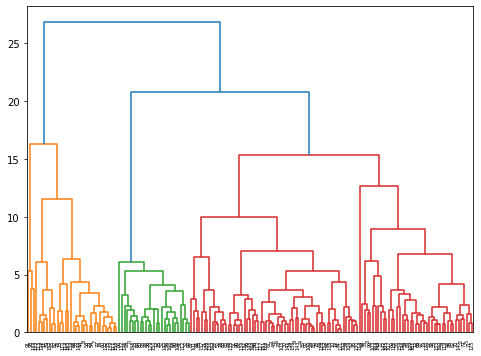

In [ ]:
linkage_array=ward(X_scaled)
plt.figure(figsize=(8,6))
dn = dendrogram(linkage_array)
plt.show()

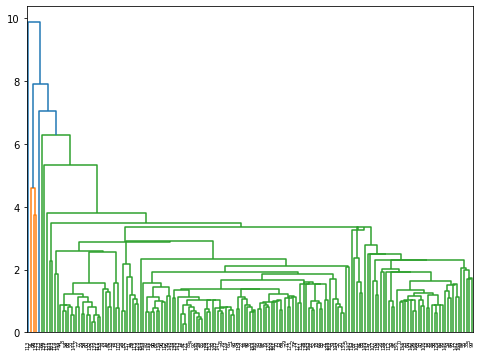

In [ ]:
Z=linkage(X_scaled,'centroid')
plt.figure(figsize=(8,6))
dn = dendrogram(Z)
plt.show()

In [ ]:
ctryclust = AgglomerativeClustering(3).fit(X_scaled)

In [ ]:
pd.crosstab(ctryclust.labels_,ckm.labels_)

col_0,0,1,2
row_0,,,
0,0,3,31
1,20,81,5
2,27,0,0


In [ ]:
ctryclust = AgglomerativeClustering(2).fit(X_scaled)

In [ ]:
ckm=KMeans(3,n_init=20,random_state=0).fit(X_scaled)

In [ ]:
pd.crosstab(ctryclust.labels_,ckm.labels_)

col_0,0,1,2
row_0,,,
0,47,81,5
1,0,3,31


In [ ]:
cntry[(ckm.labels_==0)].tail(30)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,dist_to_centroid,cluster
59,Ghana,74.7,29.5,5.22,45.9,3060,16.60,62.2,4.27,1310,0.978352,0
63,Guinea,109.0,30.3,4.93,43.2,1190,16.10,58.0,5.34,648,0.829088,0
64,Guinea-Bissau,114.0,14.9,8.50,35.2,1390,2.97,55.6,5.05,547,1.467087,0
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662,4.507446,0
72,Iraq,36.9,39.4,8.41,34.1,12700,16.60,67.2,4.56,4500,2.016640,0
80,Kenya,62.2,20.7,4.75,33.6,2480,2.09,62.8,4.37,967,1.552586,0
81,Kiribati,62.7,13.3,11.30,79.9,1730,1.52,60.7,3.84,1490,2.859599,0
84,Lao,78.9,35.4,4.47,49.3,3980,9.20,63.8,3.15,1140,1.615095,0
87,Lesotho,99.7,39.4,11.10,101.0,2380,4.15,46.5,3.30,1170,3.596154,0
88,Liberia,89.3,19.1,11.80,92.6,700,5.47,60.8,5.02,327,2.973611,0


In [ ]:
cntry[cntry['cluster']==0].sort_values(by='dist_to_centroid',ascending=False).tail(30)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,dist_to_centroid,cluster
21,Botswana,52.5,43.60,8.30,51.3,13300,8.920,57.1,2.88,6350,2.084067,0
50,Eritrea,55.2,4.79,2.66,23.3,1420,11.600,61.7,4.61,482,2.079961,0
72,Iraq,36.9,39.40,8.41,34.1,12700,16.600,67.2,4.56,4500,2.016640,0
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,2.010834,0
108,Namibia,56.0,47.80,6.78,60.7,8460,3.560,58.6,3.60,5190,1.875378,0
165,Yemen,56.3,30.00,5.18,34.4,4480,23.600,67.5,4.67,1310,1.809223,0
99,Mauritania,97.4,50.70,4.41,61.2,3320,18.900,68.2,4.98,1200,1.797179,0
97,Mali,137.0,22.80,4.98,35.1,1870,4.370,59.5,6.55,708,1.787596,0
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334,1.648369,0
84,Lao,78.9,35.40,4.47,49.3,3980,9.200,63.8,3.15,1140,1.615095,0


In [ ]:
cntry[(ckm.labels_==1)].head(30)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,dist_to_centroid,cluster
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,0.837031,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,1.414632,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,1.062536,1
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,2.164925,1
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,1.115102,1
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,1.522748,1
10,Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000,1.687588,1
12,Bangladesh,49.4,16.0,3.52,21.8,2440,7.140,70.4,2.33,758,1.944605,1
13,Barbados,14.2,39.5,7.97,48.7,15300,0.321,76.7,1.78,16000,1.242658,1
14,Belarus,5.5,51.4,5.61,64.5,16200,15.100,70.4,1.49,6030,1.339116,1


In [ ]:
ckm.cluster_centers_

array([[ 1.36021776, -0.43753313, -0.15598401, -0.18920377, -0.68689408,
         0.40211078, -1.28217981,  1.36494385, -0.60424243],
       [-0.40645337, -0.03165259, -0.2244709 ,  0.02416161, -0.25177041,
        -0.01716742,  0.25473362, -0.42434279, -0.35448141],
       [-0.82744866,  0.64507985,  0.72741122,  0.19063895,  1.48424268,
        -0.48492064,  1.07957853, -0.79187687,  1.61599536]])

In [ ]:
cntry.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'dist_to_centroid',
       'cluster'],
      dtype='object')